<div class="alert alert-success"><h1 style='text-align:center;'>Import Libraries</h1></div>

In [1]:
pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 45.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966500 sha256=5db550b94b77d3bfa13de0b546e00e98f49578b76f43e56b2d135bbe2b6ab411
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7123 sha256=5e93f7d46d579132f7f7133a44160e31cadd5ebfb1d5a0ec3a1bb504348da155
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8469 sha256=a61bda60b06be0f4f5e20cf4a12b5fe46b109cdf10945294e6687d045ef78598
  Stored in directory: /root/.cache/pip/wheels/c0

In [2]:
pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from spellchecker import SpellChecker
import contractions as ct
import string
import re
# import spacy
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Load spaCy's English model
# nlp = spacy.load('en_core_web_sm')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<div class="alert alert-success"><h1 style='text-align:center;'>Reading the Data</h1></div>

In [5]:
def read_dataset(path_to_dataset):
    
    dataset = pd.read_csv(path_to_dataset)
    
    # Concatenate the dataset headers as a row to the dataset
    columns = ['Sentiment', 'Title', 'Review']
    if list(dataset.columns) != columns:
        dataset.columns = columns
    
    # Change the data type of the columns
    dataset.Sentiment = dataset.Sentiment.astype(int)
    dataset.Title = dataset.Title.astype(str)
    dataset.Review = dataset.Review.astype(str)
    
    return (dataset)

In [7]:
data = read_dataset('/kaggle/input/amazon-reviews/amazon_reviews.csv')
data.head()

,Sentiment,Title,Review
0,2,Very disappointed,My son got this toy for his birthday. The kids...
1,1,Doesn't help with cats or dogs!,A person I work with highly recommended it. He...
2,1,Don't waste your money on this DVD,This DVD is real old school and cheezeball. Ba...
3,1,EZEKIEL 13,Mr. Spong has attempted to reduce God to base ...
4,1,Won't fit your case.,I am the fourth review and the third to compla...


In [8]:
df = data.sample(n=20000, random_state=42)

In [10]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of Sentiments: ", len(list(set(df['Sentiment']))))

Summary statistics of numerical features : 

           Sentiment

count  20000.000000

mean       1.496550

std        0.500001

min        1.000000

25%        1.000000

50%        1.000000

75%        2.000000

max        2.000000




Total number of reviews:  20000




Total number of Sentiments:  2


In [11]:
df.shape

(20000, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 20000 entries, 987231 to 809896

Data columns (total 3 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   Sentiment  20000 non-null  int64 

 1   Title      20000 non-null  object

 2   Review     20000 non-null  object

dtypes: int64(1), object(2)

memory usage: 625.0+ KB


In [13]:
df['Sentiment'].value_counts()

Sentiment
1    10069
2     9931
Name: count, dtype: int64

<div class="alert alert-success"><h1 style='text-align:center;'>Data Cleaning</h1></div>

## Handle duplicate rows

In [14]:
def remove_duplicate(df):
    dup_row_num = df.duplicated().sum()

    if dup_row_num > 0:
        df.drop_duplicates(inplace=True)
        print(f"Dropped {dup_row_num} dupliacte rows from the dataset")
        print(f'Now the dataset shape is {df.shape}')
    else:
        print(f"There is no duplicate in the dataset")
        
    return df

In [15]:
df = remove_duplicate(df)

There is no duplicate in the dataset


## Handle null values

In [16]:
def remove_null(df):
    null_row_num = df.isnull().sum().sum()

    if null_row_num > 0:
        df.dropna(inplace=True)
        print(f"Dropped {null_row_num} null rows from the dataset")
        print(f'Now the dataset shape is {df.shape}')
    else:
        print(f"There is no null values in the dataset")
    
    return df

In [17]:
df = remove_null(df)

There is no null values in the dataset


<div class="alert alert-success"><h1 style='text-align:center;'>Data Visualization</h1></div>

In [18]:
sns.set(style="whitegrid")

## Sentiment Distribution

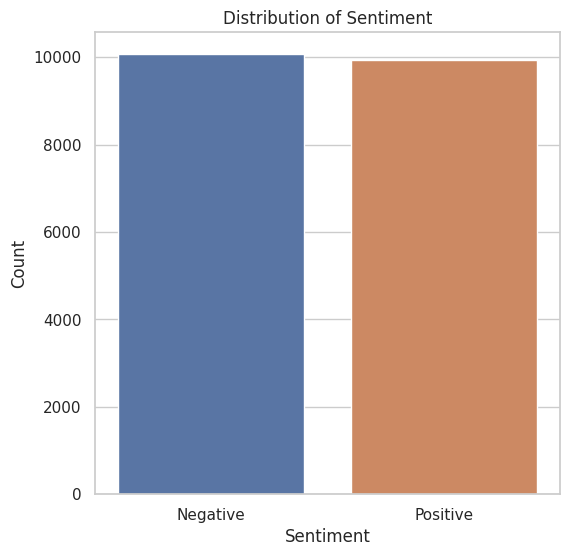

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sentiment', data=df, palette='deep')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

## Replace sentiment value from 1, 2 to 0, 1

In [9]:
df.Sentiment.replace({1:0, 2:1},inplace=True)
df.head()

,Sentiment,Title,Review
987231,0,Wanna be anti war movie,"[...].As a Vietnam veteran, one tour enlisted,..."
79954,1,Beyond the Wild Bunch,I found the book to be very informative and he...
567130,0,Disapointed,"The movie was OK, certainly not as good as the..."
500891,0,PUSS - stick to shrek,I was so looking forward to this film. I actua...
55399,0,"rude, bad grammar girl... not good for young k...",My son and I just read through our first book ...


In [47]:
pos = df[df['Sentiment']==1]
neg = df[df['Sentiment']==0]

print(f'Positive: {len(pos)}')
print(f'Negative: {len(neg)}')

Positive: 9931

Negative: 10069


## Review Length Distribution

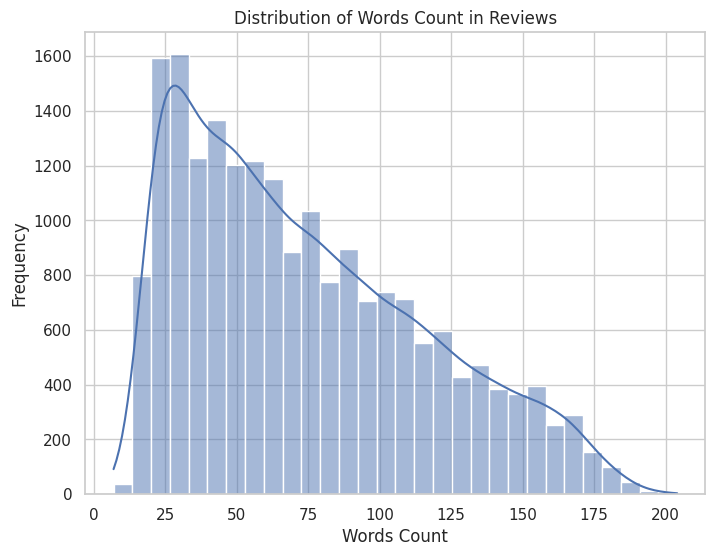

In [48]:
plt.figure(figsize=(8,6))
sns.histplot(df['Review'].apply(lambda x: len(str(x).split())), bins=30, kde=True)
plt.title('Distribution of Words Count in Reviews')
plt.xlabel('Words Count')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-success"><h1 style='text-align:center;'>Data Preprocessing</h1></div>

## Data Summary

In [49]:
min_title_sum = min(df["Title"], key=len)
max_title_sum = max(df["Title"], key=len)
min_review_sum = min(df["Review"], key=len)
max_review_sum = max(df["Review"], key=len)
count_of_words = df['Review'].str.len().sum()

In [50]:
train_sumray=pd.DataFrame(data=[[min_title_sum,len(min_title_sum)],[max_title_sum,len(max_title_sum)],
                        [min_review_sum,len(min_review_sum)],[max_review_sum,len(max_review_sum)],['nan',count_of_words]],
                       index=['min value title','max value title','min value review','max value review','count of total Letters'],
                       columns=['Text','count of Letters'])
train_sumray

,Text,count of Letters
min value title,?,1
max value title,0 STARS! Read the FINE PRINT!!!!!!!!!!!!!!!!!!...,128
min value review,A really great and useful book !,32
max value review,I found Karen Russell's St. Lucy's Home for Gi...,1006
count of total Letters,nan,8077529


In [51]:
df.Review.head()

987231    [...].As a Vietnam veteran, one tour enlisted,...
79954     I found the book to be very informative and he...
567130    The movie was OK, certainly not as good as the...
500891    I was so looking forward to this film. I actua...
55399     My son and I just read through our first book ...
Name: Review, dtype: object

## Data Cleaning

In [17]:
Emojis = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [10]:
spell = SpellChecker()
lemmatizer = WordNetLemmatizer()

In [11]:
def preprocessing(df):
    corpus = []
    
    for i in df['Review'].values:
        review = i
        
        # Expand contraction in text (e.g., can't → cannot)
        review = ct.fix(review)
        
        # Replace emojis with textual descriptions
        for emo in Emojis:
            review = re.sub(u'('+emo+')', '_'.join(Emojis[emo].replace(',', '').split()), review)
        
        # Remove HTML tags
        review = BeautifulSoup(review, "lxml").get_text()
    
        # Remove URLs and mentions
        review = re.sub(r'http\S+|@\S+', '', review)
        
        # Remove non-alphabetic characters
        review = re.sub("[^a-zA-Z]", ' ', review)
        
        # Lowercase
        review = review.lower()
        
        # Tokenization
        review = word_tokenize(review)
        
        # Spelling Correction (optional: this can be slow)
        review = [spell.correction(i) if spell.correction(i) else i for i in review]
        
        # Remove stopwords
        review = [word for word in review if word not in stopwords.words('english')]
        
        # Lemmatization (preferred over stemming)
        #review = [lemmatizer.lemmatize(word) for word in review]
        
        # Join tokens back to form the cleaned review text
        review = ' '.join(review)
        
        corpus.append(review)
    
    return corpus

In [ ]:
df_corpus = preprocessing(df)

In [25]:
df['Cleaned_Review'] = df_corpus

In [29]:
df.head()

,Sentiment,Title,Review,Cleaned_Review
0,0,Wanna be anti war movie,"[...].As a Vietnam veteran, one tour enlisted,...",vietnam veteran one tour enlisted one tour off...
1,1,Beyond the Wild Bunch,I found the book to be very informative and he...,found book informative helpful however title b...
2,0,Disapointed,"The movie was OK, certainly not as good as the...",movie certainly good others however biggest pr...
3,0,PUSS - stick to shrek,I was so looking forward to this film. I actua...,looking forward film actually waited thanksgiv...
4,0,"rude, bad grammar girl... not good for young k...",My son and I just read through our first book ...,son read first book disappointed rude lots hat...


In [30]:
df.shape

(20000, 4)

<div class="alert alert-success"><h1 style='text-align:center;'>Save Cleaned Dataset</h1></div>

In [31]:
df.to_csv('cleaned_amazon_reviews.csv', index=False)